## Desicion Tree

#### [Contoh Pemodelan Decision Tree dengan Machine Learning](https://academy.dqlab.id/main/livecode/81/152/657?pr=0)

In [3]:
install.packages("openxlsx")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [4]:
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘reshape2’, ‘partykit’, ‘Cubist’




In [5]:
library(openxlsx)
library(C50)

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 

#Menggunakan C5.0
drop_columns <- c("kpr_aktif", "pendapatan_setahun_juta", "risk_rating", "rata_rata_overdue")
datafeed <- dataCreditRating[ , !(names(dataCreditRating) %in% drop_columns)]
modelKu <- C5.0(datafeed, as.factor(dataCreditRating$risk_rating))
summary(modelKu)


Call:
C5.0.default(x = datafeed, y = as.factor(dataCreditRating$risk_rating))


C5.0 [Release 2.07 GPL Edition]  	Fri Aug  5 07:26:21 2022
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (4 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (112/30)
:   durasi_pinjaman_bulan > 24: 5 (140/55)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (246/22)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (294/86)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (41/8)
            jumlah_tanggungan > 0: 3 (67/4)


Evaluation on training data (900 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  205(22.8%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   208     2     5     6     6    (a): class 1
	    86    33    21     6    13    (b): class 2
	           4   287           

Ini adalah bentuk representasi tree dalam bentuk teks. Dimana pengecekan akan dimulai dari variable jumlah_tanggungan. Sebagai contoh, jika jumlah tanggungan lebih dari 4 dan durasi pinjaman sampai dengan maksimal 24 bulan maka rating diberikan nilai 4.

## Algoritma C5.0

#### [Data Preparation untuk Class Variable](https://academy.dqlab.id/main/livecode/81/153/659?pr=0)

In [6]:
#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
str(dataCreditRating)

#Melakukan konversi kolom risk_rating menjadi factor
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating)

#Melihat struktur setelah konversi
str(dataCreditRating)

'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : num  4 4 1 3 2 1 2 2 2 2 ...
'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 

#### [Data Preparation untuk Input Variables](https://academy.dqlab.id/main/livecode/81/153/660?pr=0)

In [7]:
#Menghilangkan beberapa variable input dari dataset 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]
str(datafeed)

'data.frame':	900 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan    : num  5 5 0 3 0 5 3 3 5 6 ...


Catatan: **kode_kontrak** harusnya tidak dipilih karena unik untuk keseluruhan data, dan tidak menjadi penentu untuk membentuk pola. Tetapi ini dimasukkan dengan tujuan untuk menunjukkan C5.0 memiliki kemampuan untuk membuang variable input yang tidak relevan secara otomatis. 

#### [Mempersiapkan Training dan Testing Set](https://academy.dqlab.id/main/livecode/81/153/662?pr=0)

In [8]:
#Mempersiapkan porsi index acak untuk training dan testing set
set.seed(100)
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

str(input_training_set)
str(class_training_set)
str(input_testing_set)

'data.frame':	800 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  36 24 36 36 36 24 12 48 48 12 ...
 $ jumlah_tanggungan    : num  1 1 5 1 5 3 3 3 0 0 ...
 Factor w/ 5 levels "1","2","3","4",..: 1 1 4 1 5 3 3 3 2 1 ...
'data.frame':	100 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  12 36 48 36 48 48 12 12 12 12 ...
 $ jumlah_tanggungan    : num  0 0 3 3 6 5 0 0 0 4 ...


#### [Menghasilkan Model dengan Fungsi C5.0](https://academy.dqlab.id/main/livecode/81/153/663?pr=0)

In [9]:
#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)

summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set)


C5.0 [Release 2.07 GPL Edition]  	Fri Aug  5 07:41:09 2022
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c): c

#### [Menghasilkan Plot dari Model C5.0](https://academy.dqlab.id/main/livecode/81/153/696?pr=0)

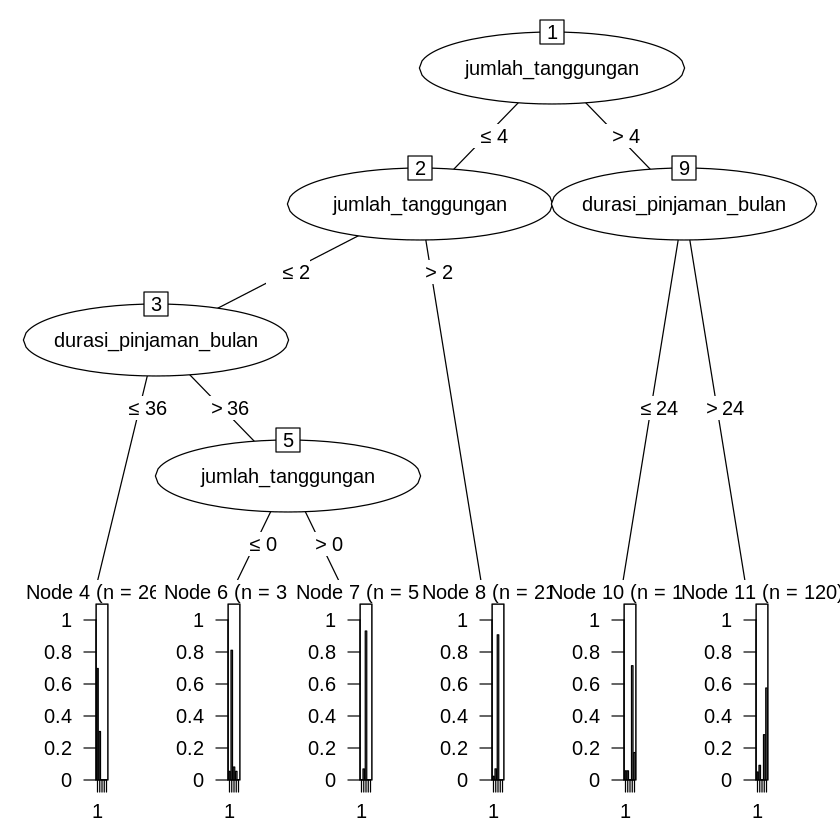

In [10]:
plot(risk_rating_model)

## Memahami Output dari Fungsi C5.0

#### [Label dari Class](https://academy.dqlab.id/main/livecode/81/154/665?pr=0)

In [11]:
#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Fri Aug  5 07:49:06 2022
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b)

#### [Jumlah Data dan Variable yang Digunakan](https://academy.dqlab.id/main/livecode/81/154/673?pr=0)

In [12]:
#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan", "kpr_aktif")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 780)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Fri Aug  5 07:52:49 2022
-------------------------------

Class specified by attribute `Risk Rating'

Read 780 cases (4 attributes) from undefined.data

Decision tree:

kpr_aktif = TIDAK:
:...durasi_pinjaman_bulan <= 36: 1 (293/103)
:   durasi_pinjaman_bulan > 36: 2 (47/7)
kpr_aktif = YA:
:...jumlah_tanggungan <= 4: 3 (247/4)
    jumlah_tanggungan > 4:
    :...durasi_pinjaman_bulan <= 24: 4 (91/17)
        durasi_pinjaman_bulan > 24: 5 (102/34)


Evaluation on training data (780 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5  165(21.2%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   190     5     2                (a): class 1
	   101    40                 1    (b): class 2
	     1     1   243                (c): class 3
	                 2    74    33    

#### [Merubah Label Class Variable](https://academy.dqlab.id/main/livecode/81/154/691?pr=0)

In [14]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "1"]  <-  "satu"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "2"]  <-  "dua"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "3"]  <-  "tiga"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "4"]  <-  "empat"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "5"]  <-  "lima"
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Fri Aug  5 07:58:02 2022
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: empat (105/30)
:   durasi_pinjaman_bulan > 24: lima (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: tiga (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: satu (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: dua (37/7)
            jumlah_tanggungan > 0: tiga (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	    30     6    11    80    19    (a): class dua
	     2    75    3

## Evaluasi Model

#### [Menggunakan Fungsi Predict](https://academy.dqlab.id/main/livecode/81/155/672?pr=0)

In [15]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menggunakan model untuk prediksi testing set
predict(risk_rating_model, input_testing_set)

[1] 1 1 3 3 5 5 1 1 1 3 1 2 1 1 3 3 1 3 3 3 3 3 1 5 1 1 3 1 3 5 1 1 2 1 5 1 1
 [38] 5 3 3 3 3 4 3 3 1 3 5 2 3 2 5 3 5 1 5 4 5 3 4 1 3 4 4 3 5 5 5 3 1 1 1 1 3
 [75] 5 1 4 5 3 1 3 3 3 3 3 1 3 3 5 4 5 3 3 3 1 1 5 5 3 3
Levels: 1 2 3 4 5

#### [Menggabungkan Hasil Prediksi](https://academy.dqlab.id/main/livecode/81/155/693?pr=0)

In [16]:
#menyimpan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)
print(input_testing_set)

    durasi_pinjaman_bulan jumlah_tanggungan risk_rating hasil_prediksi
3                      12                 0           1              1
5                      36                 0           2              1
8                      48                 3           2              3
40                     36                 3           2              3
41                     48                 6           2              5
44                     48                 5           2              5
58                     12                 0           1              1
70                     12                 0           1              1
109                    12                 0           1              1
110                    12                 4           3              3
122                    12                 0           1              1
151                    48                 0           2              2
179                    36                 1           1              1
180   

#### [Membuat Table Confusion Matrix](https://academy.dqlab.id/main/livecode/81/155/686?pr=0)

In [18]:
library("reshape2")

In [19]:
#membuat confusion matrix
dcast(hasil_prediksi ~ risk_rating, data=input_testing_set)

Using hasil_prediksi as value column: use value.var to override.

Aggregation function missing: defaulting to length



hasil_prediksi,1,2,3,4,5
<fct>,<int>,<int>,<int>,<int>,<int>
1,24,6,0,0,0
2,0,3,1,0,0
3,0,2,37,0,0
4,0,0,0,7,0
5,0,2,0,2,16


#### [Jumlah Data dengan Prediksi Benar](https://academy.dqlab.id/main/livecode/81/155/701?pr=0)

In [20]:
#Menghitung jumlah prediksi yang benar
nrow(input_testing_set[input_testing_set$risk_rating==input_testing_set$hasil_prediksi,])

[1] 87

#### [Jumlah Data dengan Prediksi Salah](https://academy.dqlab.id/main/livecode/81/155/702?pr=0)

In [21]:
#Menghitung jumlah prediksi yang salah
nrow(input_testing_set[input_testing_set$risk_rating!=input_testing_set$hasil_prediksi,])

[1] 13

## Menggunakan Model untuk Prediksi

#### [Mempersiapkan Data Pengajuan Baru](https://academy.dqlab.id/main/livecode/81/156/682?pr=0)

In [22]:
#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)
print(aplikasi_baru)

  jumlah_tanggungan durasi_pinjaman_bulan
1                 6                    12


#### [Melakukan Prediksi terhadap Data Pengajuan Baru](https://academy.dqlab.id/main/livecode/81/156/681?pr=0)

In [23]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)

#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)

#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 4
Levels: 1 2 3 4 5

#### [Merubah Durasi Pinjaman](https://academy.dqlab.id/main/livecode/81/156/692?pr=0)

In [24]:
#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 64)

#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 5
Levels: 1 2 3 4 5